###Named Entity Recognition con NLTK y Spacy

Como usted ya ha aprendido a procesar datos con la librería NLTK, la cual es muy utilizada en el estado de arte, debe de saber que no es la única, hay muchas más entre ellas se destaca SpaCy por su fácil implementación.

En esta guía usted aprenderá a tener los conocimientos básicos en una tarea de PLN indispensable como lo es el reconocimiento de entidades (Named Entity Recognition, NER).El NER es probablemente el primer paso hacia la extracción de información automático a partir del texto, que consiste en reconocer y clasificar términos importantes. No yendo muy lejos, pongamos un ejemplo orientado al campo biomédico. 

###Caso de estudio:

Imagine que usted hace parte de un grupo de investigación y dicho grupo tiene a su disposición una gran cantidad de resgistros médicos electrónicos. Estos registros contienen todos los datos e información de atención médica de una persona a lo largo de toda su vida a partir de su primer ingreso a una Institución de salud. Ahora, suponga que el grupo de investigación tiene el interés en la extracción de términos que signifiquen un factor de riesgo para la enfermedad cerebrocardiovascular (ECV), como por ejemplo si la persona padece de sobrepeso/obesidad, hipertensión, diabetes, dislipidemia , enfermedad renal crónica (ERC), aterioesclerosis, síndrome de apnea obstructiva del sueño (SAOS), tabaquismo, abuso de alcohol (A2), antecedentes familiares de ECV, edad, sexo, etc. 

Para llevar a cabo esta tarea de NER bajo el contexto del reconocimiento de factores de riesgo para ECV, los investigadores deben de identificar primero qué factores de riesgo les interesa reconocer en el texto, pero para esto es necesario del conocimiento de médicos con experiencia en el tratamiento y diagnóstico de ECV.
Una vez reconocido los factores de riesgo, el equipo se pone manos a la obra para etiquetar los conceptos de interés (factores de riesgo) en el software preelegigo para esta etapa, entre estos programas de etiquetado se destaca Brat e Inception (siéntase libre de googlearlo y buscar algunas imágenes). A continuación se anexa una imagen para que pueda comprender con mayor facilidad cómo funcionan estos programas de etiquetado: 





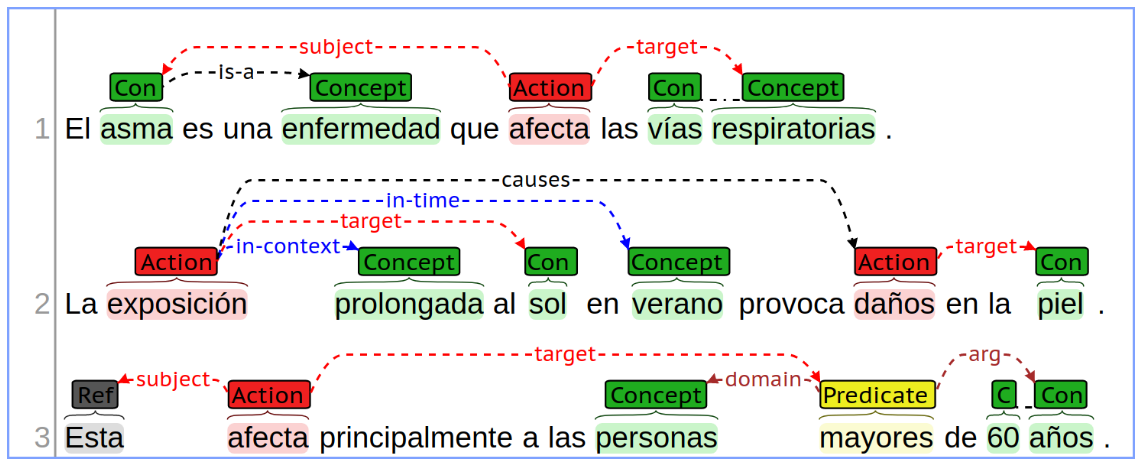

De acuerdo a la figura anterior note que las etiquetas para este ejemplo son: Concept, Action, Reference, Con (hace referencia al qué) y Predicate. 

Para la palabra *Enfermedad* lo clasifican bajo la etiqueta de **Concept**, *afecta* como una  **Action**, *exposición* como **Action**, *prolongada* como **Concept**, etc. Si hiciéramos una imagen de acuerdo a nuestro ejemplo basado en el contexto de ECV, nuestras etiquetas vendrían a ser el conjunto de factores de riesgo (edad, sexo, comorbilidad, síntomas, medicamentos, dx, etc) en lugar de Action, Ref, Concept, Predicate y Con. Sin embargo, no significa que estas etiquetas estén mal o no puedan ser útil, de hecho podrían servir pero una vez más, todo dependerá del objetivo de la tarea de NER para así poder seleccionar las etiquetas más acordes al problema planteado. 

Ahora supongamos que tenemos el siguiente  ejemplo y que estará más orientado al contexto de ECV: 

Paciente femenina, 25 años, con un dx de isquemía del hemisferio izquierdo, con antescedentes de farmacodependencia de marihuana y diazepam, labora como fumigadora en cultivos de arroz. Fc: 58 lat/ min, fr: 24/min, temperatura: 38.9°c, pa: 120/282, cambios en la audición, perdida de memoria, dificultad para degluir y perdida del equilibrio, problemas de visión en ambos ojos y cambios emocionales. 

Muy probablemente usted y su equipo etiqueten la palabra femenina bajo la etiqueta de **sexo**, 25 años bajo la etiqueta de **edad**. Cambios en la audición, perdida de memoria, dificultad para degluir, perdida del equilibrio, problemas de visión y cambios emocionales bajo la etiqueta de **Síntomas**, marihuana como una **sustancia química**, diazepam **medicamento**, etc.

Espero que ambos ejemplos le hayan servido y el tema del etiquetado sea más compresible para usted. 







Tras finalizada la etapa de etiquetado lo que se debe realizar es procesar los datos, **¡¡Esta etapa es muy muy muy importante!!** 

En el texto es bastante común que haya errores de ortografía y como es de esperar basado en el tiempo promedio de una consulta médica que rodea entre los 15-25 min apróximadamente, el médico encargado tendrá muy poco tiempo en escribir correctamente sin olvidar de que la jerga y abrevaciones médicas pueden variar significamente entre un médico y otro, lo cual también es un reto para afrontar en el procesamiento de los datos. En este etapa se comienza la preparación para su organización, la detección de errores y el descarte de información repetitiva e incompleta. De este modo, se pasa a seleccionar la información necesaria y puntual con la que se trabajará para el procesamiento y análisis de datos. Dado lo anterior, en esta etapa se puede eliminar palabras mal escritas o bien sea corregirlas con una serie de algoritmos especiales para ello, eliminación de palabras poco aportantes como por ejemplo palabras como: por, para, de, el, las, entonces, que, etc,  a estas palabras poco aportantes se les conoce como **palabras vacías**; eliminación de caracteres especiales como #,%,&,/,+,-,*, etc; eliminación de fechas o encabezados de la historía clínica, entre otros. 


Posteriormente se sigue con la etapa de caracterización de los datos, que tiene como función capturar información y atributos de los datos. Entre las características se puede tener **identificadores únicos de conceptos médicos (CUI)**, es decir, a partir de este CUI que sirve como una clase de "identificación" se pueda identificar si la palabra (dato) es un medicamento, un síntoma, un examen de laboratorio, una comorbilidad, un dx, una fecha, etc.  Por otro lado, también se pueden tener características léxicas o morfológicas como por ejemplo el stemming, el cual consiste en reducir una palabra a su raíz, por ejemplo: 

        Palabra                               Stemming
        toro                                    tor
        tormenta                                torment
        tormentas                               torment
        chicharrones                            chicharron
        chicles                                 chicle
        pacientes                               paciente
        sangrado                                sangr
        sangre                                  sangr
        sangré                                  sangr
        sangraron                               sangr

En la actualidad se encuentran muchas características que se pueden extraer a partir del texto y se pueden implementar tales como la *frecuencia o conteo de palabras* (cuántas veces x palabra aparece en todo un documento, ejemplo, la palabra "paciente" apareció 100 veces en todo el documento), *Word embedding*(que básicamente son vectores que almacenan numeritos y brindan información sobre las semejanzas semánticas entre las palabras) , entre otros. Para no complicarnos mucho, déjaremos hasta ahí pero es importante que sepa que en el estado de arte se puede encontrar muchas características, todo es cuestión de ensayo y error e ir mirando cuáles brindan una mayor información de los datos, tampoco se trata de tener cientos y miles de características, lo cual no es necesario ya que podría confundir al algoritmo y lo sobreexplota de información que puede ser innecesaria, ¿y esa no es la idea, verdad?

Cabe mencionar que existe un proceso específico que se encarga exclusivamene de extraer caracterísicas de los datos (para nuestro caso, datos= El texto contenido en la historía clínica) , el cual se llama  **ingeniería de características**, esta se define como aquella etapa donde se utiliza para seleccionar y transformar los datos cuando se van a emplear como insumo  en algoritmos de inteligencia artificial, ¿bastante cool, no?

Como última etapa, se implementar un algoritmo para NER a partir de la información suministrada bajo las características que se utilizaron. Al final de esta etapa se puede evaluar que tan bien o que tan mal lo hizo el algoritmo a partir de las medidas de desempeño.  


Además de la implementación de NER para el campo biomédico, el NER también podría ser útil para responder preguntas del mundo real, como

* ¿Qué empresas se mencionaron en un artículo?
* ¿Se mencionaron productos específicos en quejas o reseñas?
* O para el caso de los Tweet que estuvimos trabajando en guías anteriores, se podría responder: ¿El tweet contiene el nombre de una persona?,¿Ubicación?,¿Páginas web?, ¿Promocionando algún producto?, etc.


En esta guía usted aprenderá a construir un esquema de NER con NLTK y SpaCy, para identificar los nombres de las cosas, entre ellos personas, organizaciones o lugares a partir del texto libre. 


### Recomendación: 



In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
import re
import string

Extracción de Información

Tome cualquier frase de las siguientes páginas de noticias: https://www.nytimes.com/, https://www.aljazeera.com/where/colombia/.

Para este ejemplo, se tomará un segmento de la segunda página. 

In [ ]:
Example='European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'

In [ ]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent



Obtenemos una lista de tuplas que contienen las palabras individuales en la oración y su parte gramatical asociada:

In [ ]:
sent = preprocess(Example)
sent

[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

Ahora implementaremos la fragmentación de frases nominales para identificar entidades nombradas utilizando una expresión regular que consta de reglas que indican cómo se deben fragmentar las oraciones.
La creación de reglas gramaticales son muy comunes en el NER, pero para ello se requiere de tiempo y de personas expertas con altos conocimientos en gramática y sintaxis. El campo de la sintaxis es el campo de la grámatica que estudia el modo en que se agrupan las palabas o grupo de palabras, es decir, los sintagmas, y su relación entre sí. 

Para comprender el uso de reglas gramáticales para el NER es necesario que usted comprenda una serie de conceptos importantes. 

Años atrás cuando estábamos en el colegio nos enseñaron que a una oración sencilla la compone un sujeto y un predicado. Un sintagma nomimal vendría a ser el mismo sujeto de una oración, es decir, debe de responnder a la pregunta ¿de quién se está hablando?, por otro lado está el sintagma verbal que sería el  predicado y responde a la pregunta ¿qué se dice del sintagma nominal (sujeto)?, ejemplo, considere la siguiente oración: 

* María corre rápido. 
Como se puede ver se está hablando de María (sintagma nominal) y lo que inferimos es que corre rápido (sintagma verbal).
* Él trabaja mucho. ¿De quién se habla? de él (sintagma nominal), ¿qué se dice del sujeto? trabaja mucho (sintagma verbal). 

* Un sintagma nominal también podría estar compuesto por un determinante + sustantivo. Suponga: El señor trabaja mucho. 

        El: determinante
        Señor: sustantivo 
        El señor: sintagma nominal
        El señor es el sujeto de la oración

* Sintagma que requiere de varios sustantivos: La silla y la mesa son de vidrio.

        Sintagma nominal 1: la silla
        Sintagma nominal 2: la mesa
        Sujeto: la silla y la mesa

* Un sujeto puede ser cualquier palabra e incluso un verbo en una oración: Respetar es muy importante.
        ¿De qué se está hablando? de respetar
        Sintagma nominal: respetar
        Sujeto: respetar

* Sintagma nominal con determinante + sustantivo + adjetivo: La niña bonita juega todos los días.

        ¿De quién se está hablando? de la niña bonita
        Sintagma nominal/sujeto: la niña bonita
        Determinante: la
        Sustantivo: niña
        Adjetivo: bonita








Nuestro patrón de fragmentos consta de una regla, que debe formarse un **sintagma nominal (NP)** siempre que el fragmento encuentre un **determinante o(DT)** (opcional) seguido de cualquier número de **adjetivos (JJ)** y luego un **sustantivo (NN)**.

In [ ]:
pattern = 'NP: {<DT>?<JJ>*<NN>}' #determinante opcional (DT) por ese el ? seguido de adjetivo (JJ) y un sustantivo (NN), ambos obligatorios * 

### Fragmentando: 
Usando este patrón, creamos un analizador de fragmentos y lo probamos en nuestra oración.

In [ ]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  European/JJ
  authorities/NNS
  fined/VBD
  Google/NNP
  (NP a/DT record/NN)
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  (NP power/NN)
  in/IN
  (NP the/DT mobile/JJ phone/NN)
  (NP market/NN)
  and/CC
  ordered/VBD
  (NP the/DT company/NN)
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


La salida se puede leer como un árbol o una jerarquía con S como primer nivel, que denota oración. también podemos mostrarlo gráficamente como en la siguiente figura: 

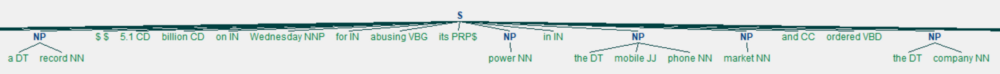

Nota: Note que para este ejemplo de NER nos interesa saber de quién o qué se está hablando (sintagma nominal, no lo olvide) y como aprendió anteriormente, dicho sintagma puede estar compuesto por más de una palabra, es decir, estaríamos hablando de una multientidad, para ello existe un formato de etiqueta mundialmente conocido como BIO targget que puede ser útil para identificar cuando el sintagma posee más de una palabra, estas etiquetas BIO funcionan de la siguiente manera#

    B para indicar el comienzo de la entidad
    I para indicar las palabras que hay en el interior
    O para indicar no entidad

Supongamos el siguiente ejemplo (Deseamos sólo extraer sujetos):
*  María Camila adora aprender:

        Sujeto/sintagma nominal: María Camila
        Etiqueta BIO: B-María (por ser la primera palabra del sujeto)
        I-Camila (palabra interior en el sujeto) 
        O-adora (no es una entidad que nos interesa)
        O-aprender (tampoco nos interesa, recuerde que estamos enfocados en extraer de quién o qué se está hablando (sintagma nominal)


In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags
from nltk.chunk import ne_chunk
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('European', 'JJ', 'O'),
 ('authorities', 'NNS', 'O'),
 ('fined', 'VBD', 'O'),
 ('Google', 'NNP', 'O'),
 ('a', 'DT', 'B-NP'),
 ('record', 'NN', 'I-NP'),
 ('$', '$', 'O'),
 ('5.1', 'CD', 'O'),
 ('billion', 'CD', 'O'),
 ('on', 'IN', 'O'),
 ('Wednesday', 'NNP', 'O'),
 ('for', 'IN', 'O'),
 ('abusing', 'VBG', 'O'),
 ('its', 'PRP$', 'O'),
 ('power', 'NN', 'B-NP'),
 ('in', 'IN', 'O'),
 ('the', 'DT', 'B-NP'),
 ('mobile', 'JJ', 'I-NP'),
 ('phone', 'NN', 'I-NP'),
 ('market', 'NN', 'B-NP'),
 ('and', 'CC', 'O'),
 ('ordered', 'VBD', 'O'),
 ('the', 'DT', 'B-NP'),
 ('company', 'NN', 'I-NP'),
 ('to', 'TO', 'O'),
 ('alter', 'VB', 'O'),
 ('its', 'PRP$', 'O'),
 ('practices', 'NNS', 'O')]


En esta representación, hay un token por línea, cada uno con su etiqueta de parte del discurso y su etiqueta de entidad nombrada. Con base en este corpus de entrenamiento, podemos construir un etiquetador que se puede usar para etiquetar nuevas oraciones; y utilizar la función nltk.chunk.conlltags2tree () para convertir las secuencias de etiquetas en un árbol de fragmentos.

Con la función **nltk.ne_chunk ()**, podemos reconocer entidades nombradas usando un clasificador, el clasificador agrega etiquetas de categoría como **PERSONA**, **ORGANIZACIÓN** y **GPE**.

In [ ]:

ne_tree = ne_chunk(pos_tag(word_tokenize(Example)))
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


Note que Google es reconocido como persona. Es bastante decepcionante, ¿no le parece?

NER con Spacy:

El reconocimiento de entidad con nombre de SpaCy se ha entrenado en el corpus de OntoNotes 5 y es compatible con los siguientes tipos de entidad: 

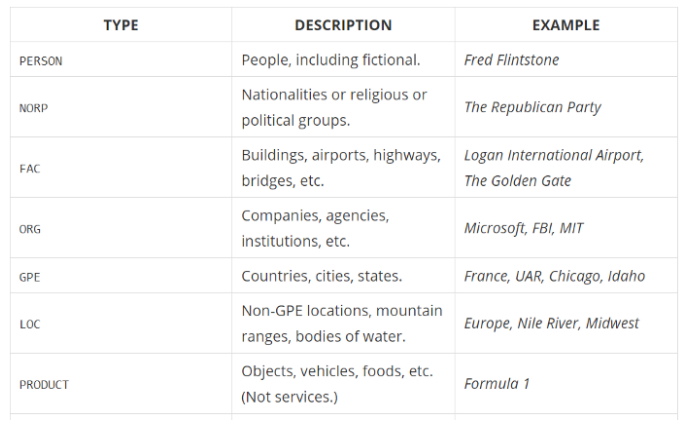

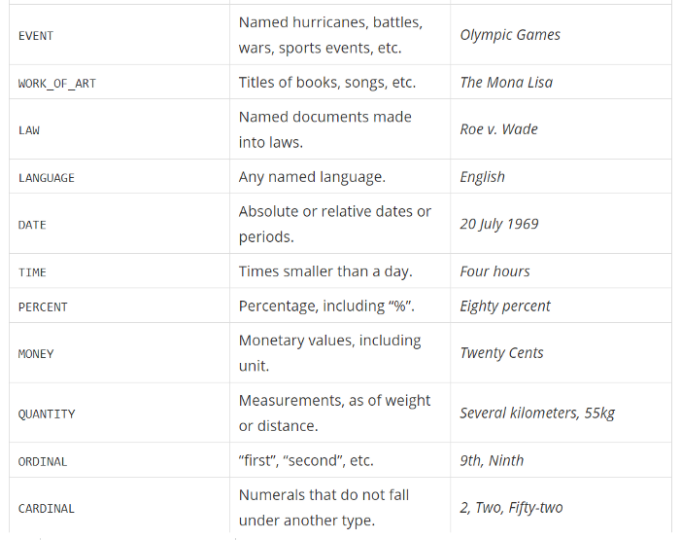

Para mayor información visite: https://spacy.io/usage/linguistic-features

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load() #Modelo pre-entrenado para inglés 

In [ ]:
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')

In [ ]:
print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


Europeo es NORD (nacionalidades o grupos religiosos o políticos), Google es una organización, $ 5.1 mil millones es un valor monetario y el miércoles es un objeto de fecha. Todos son correctos. **¡Bravo SpaCy!**

Su turno: Implemente NER con un modelo de spacy ya entrenado para el idioma español. 